In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
s1_local_client_TT_path = 'output/local_client_TT_Claudia.txt'
s1_local_server_TT_path  = 'output/local_server_TT_Claudia.txt'

s2_local_client_TT_path = 'output/local_client_TT_Luiza.txt'
s2_local_server_TT_path  = 'output/local_server_TT_Luiza.txt'

#s3_local_client_TT_path = 'output/local_client_TT.txt'
#s3_local_server_TT_path  = 'output/local_server_TT.txt'

In [6]:
s1_local_client_TT = pd.read_csv(s1_local_client_TT_path, sep=',', header=None, names=['id', 't1_client', 't2_client'])
s1_local_server_TT = pd.read_csv(s1_local_server_TT_path, sep=',', header=None, names=['id', 't1_server', 't2_server'])

s1_local_TT = pd.merge(s1_local_client_TT, s1_local_server_TT, on='id')

s2_local_client_TT = pd.read_csv(s2_local_client_TT_path, sep=',', header=None, names=['id', 't1_client', 't2_client'])
s2_local_server_TT = pd.read_csv(s2_local_server_TT_path, sep=',', header=None, names=['id', 't1_server', 't2_server'])

s2_local_TT = pd.merge(s2_local_client_TT, s2_local_server_TT, on='id')


#s3_local_client_TT = pd.read_csv(s3_local_client_TT_path, sep=',', header=None, names=['id', 't1_client', 't2_client'])
#s3_local_server_TT = pd.read_csv(s3_local_server_TT_path, sep=',', header=None, names=['id', 't1_server', 't2_server'])

#s3_local_TT = pd.merge(s3_local_client_TT, s3_local_server_TT, on='id')

In [7]:
s1_local_TT['t1'] = s1_local_TT['t1_server'] - s1_local_TT['t1_client']
s1_local_TT['t2'] = s1_local_TT['t2_client'] - s1_local_TT['t2_server']

s2_local_TT['t1'] = s2_local_TT['t1_server'] - s2_local_TT['t1_client']
s2_local_TT['t2'] = s2_local_TT['t2_client'] - s2_local_TT['t2_server']

#s3_local_TT['t1'] = s3_local_TT['t1_server'] - s3_local_TT['t1_client']
#s3_local_TT['t2'] = s3_local_TT['t2_client'] - s3_local_TT['t2_server']

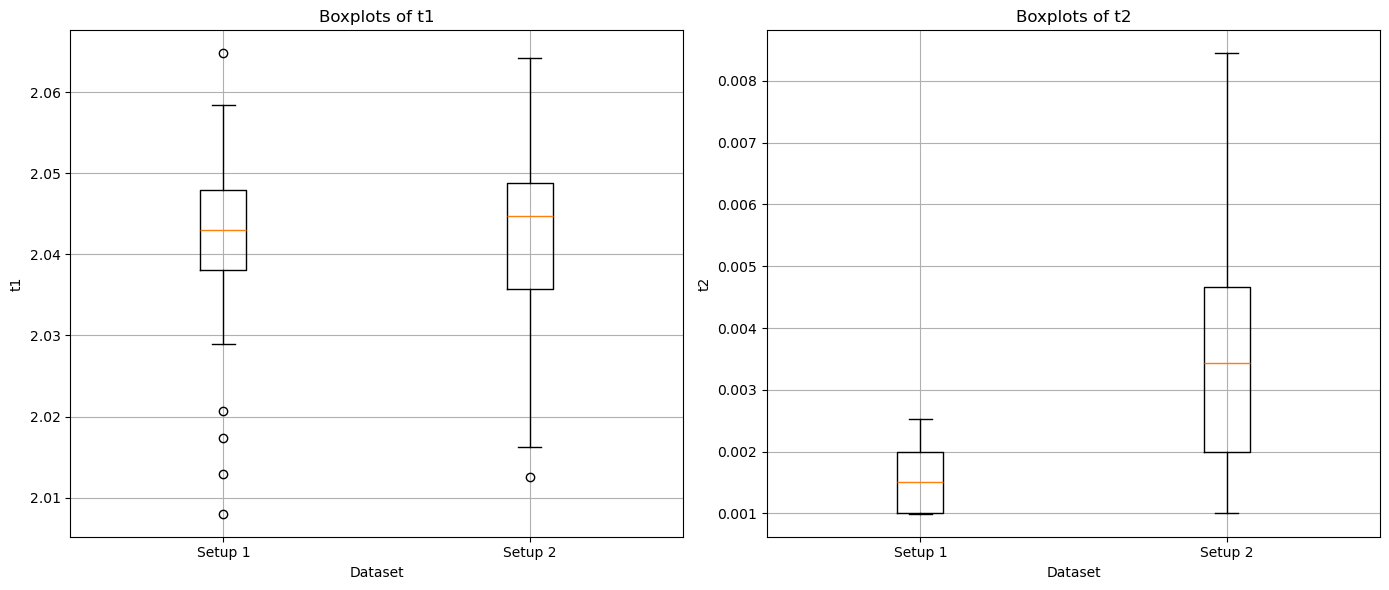

In [9]:
plt.figure(figsize=(14, 6))

# Boxplots for t1
plt.subplot(1, 2, 1)
plt.boxplot([s1_local_TT['t1'], s2_local_TT['t1']], vert=True, labels=['Setup 1', 'Setup 2'])
plt.title('Boxplots of t1')
plt.xlabel('Dataset')
plt.ylabel('t1')
plt.grid(True)

# Boxplots for t2
plt.subplot(1, 2, 2)
plt.boxplot([s1_local_TT['t2'], s2_local_TT['t2']], vert=True, labels=['Setup 1', 'Setup 2'])
plt.title('Boxplots of t2')
plt.xlabel('Dataset')
plt.ylabel('t2')
plt.grid(True)

plt.tight_layout()
plt.show()